In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import math

fileWineQuality = r'dataset/wineQualityReds.csv'
file130k = r'dataset/winemag-data-130k-v2.csv'
file150k = r'dataset/winemag-data_first150k.csv'

In [2]:
dfWineQuality = pd.read_csv(fileWineQuality)
dfWineMag130 = pd.read_csv(file130k)
dfWineMag150 = pd.read_csv(file150k)

In [3]:
print(dfWineQuality.columns)

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [4]:
print(dfWineMag150.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')


In [5]:
print(dfWineMag150.describe())

          Unnamed: 0         points          price
count  150930.000000  150930.000000  137235.000000
mean    75464.500000      87.888418      33.131482
std     43569.882402       3.222392      36.322536
min         0.000000      80.000000       4.000000
25%     37732.250000      86.000000      16.000000
50%     75464.500000      88.000000      24.000000
75%    113196.750000      90.000000      40.000000
max    150929.000000     100.000000    2300.000000


# Is the best wine universal?

## Does the price reflect the quality of the wine ?

In [6]:
pointsToPrice = {}

for point in range(0,101) :
    mean = dfWineMag150[(dfWineMag150.points == point)]["price"].mean()
    if not math.isnan(mean):
        pointsToPrice[point] = mean
    
print(pointsToPrice)

{80: 17.2242355605889, 81: 17.66507828454731, 82: 19.171878972794303, 83: 18.013604270707766, 84: 19.367885375494073, 85: 20.05506721820062, 86: 21.816528464915336, 87: 24.588278580814716, 88: 27.831295996008482, 89: 32.538375010815955, 90: 37.35781727297973, 91: 43.7558354141787, 92: 52.30360881882005, 93: 66.42543775254954, 94: 81.93781177253076, 95: 108.92701227830833, 96: 132.35097001763668, 97: 178.0, 98: 232.1315789473684, 99: 289.525, 100: 401.5833333333333}


[]

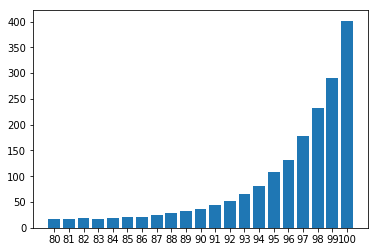

In [7]:
plt.bar(range(len(pointsToPrice)), pointsToPrice.values(), align="center")
plt.xticks(range(len(pointsToPrice)), list(pointsToPrice.keys()))

plt.plot()

## Is there any composition that is more liked ?

In [8]:
qualityToAlcool = {}

for q in range(0,11) :
    mean = dfWineQuality[(dfWineQuality.quality == q)]["alcohol"].mean()
    if not math.isnan(mean):
        qualityToAlcool[q] = mean
    
print(qualityToAlcool)

{3: 9.955000000000002, 4: 10.265094339622639, 5: 9.899706314243753, 6: 10.629519331243463, 7: 11.465912897822443, 8: 12.094444444444443}


In [9]:
qualityToPH = {}

for q in range(0,11) :
    mean = dfWineQuality[(dfWineQuality.quality == q)]["pH"].mean()
    if not math.isnan(mean):
        qualityToPH[q] = mean
    
print(qualityToPH)

{3: 3.3979999999999997, 4: 3.381509433962264, 5: 3.3049486049926546, 6: 3.3180721003134837, 7: 3.290753768844219, 8: 3.2672222222222214}


We can also make a count by every column to check if every wine of the same rating a similar in composition

## Which country produces the best wine ?

In [10]:
countryToPoints = {}

for c in set(dfWineMag150["country"]) :
    mean = dfWineMag150[(dfWineMag150.country == c)]["points"].mean()
    if not math.isnan(mean):
        countryToPoints[c] = mean
    
countryToPointsSorted = {k: v for k, v in sorted(countryToPoints.items(), key=lambda item: item[1])}
print(countryToPointsSorted)

{'South Korea': 81.5, 'China': 82.0, 'Montenegro': 82.0, 'Brazil': 83.24, 'Slovakia': 83.66666666666667, 'Egypt': 83.66666666666667, 'Lithuania': 84.25, 'Uruguay': 84.47826086956522, 'Ukraine': 84.6, 'Moldova': 84.71830985915493, 'Bosnia and Herzegovina': 84.75, 'Mexico': 84.76190476190476, 'Macedonia': 84.8125, 'Romania': 84.92086330935251, 'Japan': 85.0, 'Bulgaria': 85.46753246753246, 'Georgia': 85.51162790697674, 'Lebanon': 85.70270270270271, 'Czech Republic': 85.83333333333333, 'Cyprus': 85.87096774193549, 'Argentina': 85.9960930562955, 'Tunisia': 86.0, 'Greece': 86.11764705882354, 'Croatia': 86.28089887640449, 'Chile': 86.29676753782668, 'Spain': 86.64658925979681, 'Luxembourg': 87.0, 'Israel': 87.17619047619047, 'South Africa': 87.22542072630647, 'Switzerland': 87.25, 'Hungary': 87.32900432900433, 'New Zealand': 87.55421686746988, 'India': 87.625, 'Serbia': 87.71428571428571, 'US': 87.81878936487331, 'Australia': 87.89247528747227, 'US-France': 88.0, 'Albania': 88.0, 'Portugal': 

We can also dive into which country produces which "kind" of wine

we can also see which country produces most of the wine of the dataset:

In [11]:
countryToCount = {}

for c in set(dfWineMag150["country"]) :
    mean = dfWineMag150[(dfWineMag150.country == c)].shape[0]
    if not math.isnan(mean):
        countryToCount[c] = mean
    
countryToCountSorted = {k: v for k, v in sorted(countryToCount.items(), key=lambda item: item[1])}
print(countryToCountSorted)

{nan: 0, 'US-France': 1, 'Japan': 2, 'Albania': 2, 'Tunisia': 2, 'Montenegro': 2, 'Slovakia': 3, 'Egypt': 3, 'China': 3, 'Bosnia and Herzegovina': 4, 'South Korea': 4, 'Switzerland': 4, 'Ukraine': 5, 'Czech Republic': 6, 'Lithuania': 8, 'India': 8, 'England': 9, 'Luxembourg': 9, 'Morocco': 12, 'Serbia': 14, 'Macedonia': 16, 'Brazil': 25, 'Cyprus': 31, 'Lebanon': 37, 'Georgia': 43, 'Turkey': 52, 'Mexico': 63, 'Moldova': 71, 'Bulgaria': 77, 'Croatia': 89, 'Uruguay': 92, 'Slovenia': 94, 'Romania': 139, 'Canada': 196, 'Hungary': 231, 'Israel': 630, 'Greece': 884, 'South Africa': 2258, 'Germany': 2452, 'Austria': 3057, 'New Zealand': 3320, 'Australia': 4957, 'Portugal': 5322, 'Argentina': 5631, 'Chile': 5816, 'Spain': 8268, 'France': 21098, 'Italy': 23478, 'US': 62397}


## OTHER

Faire un cloud point of diffenrent wine description with "stand out words"

We can also make two axis en mode :
    
 une caracteristique
        
....x...|...x..... <br/>
....... .|......... <br/>
------------------  une autre <br/>
........|....x....   <br/>                 
.x.....|.........   <br/>                 
  le contraire
